* Project Team member name : Anuja Arun Nilak
* Project Team Id :  PTID-CDS-JUL-25-2871
* Project Code : PRCP-1016-HeartdiseasePred
* Project Name : Heart Disease Prediction

# Goal:
* The primary objective of this project is to develop a machine learning model that can accurately predict the presence of heart disease based on patient data. The model should help in early diagnosis, enabling timely medical intervention and reducing health risks.

# Business Case:
* **Heart diseases are one of the leading causes of mortality worldwide. Early detection plays a crucial role in improving patient outcomes and reducing healthcare costs. A reliable heart disease prediction model can:
* Assist doctors in decision-making.
* Improve preventive care strategies.
* Reduce the burden on healthcare systems by prioritizing high-risk patients.
By leveraging machine learning, hospitals and clinics can automate risk assessment, ensuring efficient diagnosis and better patient care.

In [4]:
#import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data1=pd.read_csv('labels.csv')
data1

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [6]:
data2=pd.read_csv('values.csv')
data2

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [7]:
#I combined the label and value data into one to simplify the analysis and make it easier to build predictive models.
#Joint table on the basis of primary key patient id 
data = pd.merge(data2,data1,on='patient_id')
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# Basic Check

In [9]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


# Domain Analysis

* 1)'patient_id': A unique identifier assigned to each patient in the dataset. It is used to track individual records without revealing personal information.
* 2)'slope_of_peak_exercise_st_segment': Represents the slope of the ST segment during peak exercise, which can indicate the presence of exercise-induced ischemia and help assess heart health. 
Normal range: 0 to 2
0 = Upsloping, 1 = Flat, 2 = Downsloping. Downsloping can indicate heart disease.
* 3)'thal': Refers to thalassemia, a blood disorder that can affect heart function, with different types indicating varying severity levels of the condition.
Normal values: 3 (normal), 6 (fixed defect), 7 (reversible defect)
A "normal" value (3) indicates no thalassemia-related problems.
* 4)'resting_blood_pressure': Measures the blood pressure of a patient while at rest. High resting blood pressure can be a key risk factor for heart disease.
Normal range: 90/60 mm Hg to 120/80 mm Hg
High blood pressure (hypertension) is typically defined as ≥ 130/80 mm Hg.
* 5)'chest_pain_type': Describes the type of chest pain the patient experiences, with different categories indicating the severity or type of pain related to heart problems.
Normal values: 0, 1, 2, 3
0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic
* 6)'num_major_vessels': Indicates the number of major blood vessels (coronary arteries) that are blocked or narrowed, which can directly impact heart disease risk.
Normal range: 0 to 3
Indicates the number of major coronary arteries affected by disease.
* 7)'fasting_blood_sugar_gt_120_mg_per_dl': A binary indicator that shows if a patient's fasting blood sugar level is greater than 120 mg/dL, which may suggest diabetes or increased heart disease risk.
Normal range: < 120 mg/dL
A fasting blood sugar level > 120 mg/dL could indicate diabetes or pre-diabetes.
* 8)'resting_ekg_results': Displays the results of a patient's resting electrocardiogram (EKG) test, which helps identify abnormal heart rhythms or other heart conditions.
Normal values: 0, 1, 2
0 = Normal, 1 = Having ST-T wave abnormality, 2 = Showing probable or definite left ventricular hypertrophy.
* 9)'serum_cholesterol_mg_per_dl': Represents the level of cholesterol in the blood. High cholesterol levels can increase the risk of heart disease by leading to plaque buildup in the arteries.
Normal range: < 200 mg/dL
Borderline high: 200-239 mg/dL, High: ≥ 240 mg/dL.
* 10)'oldpeak_eq_st_depression': Indicates the amount of depression in the ST segment during exercise testing. Higher depression values may signal heart disease or ischemia.
Normal range: 0 to 1.0
Depression values greater than 1.0 suggest a higher likelihood of heart disease.
* 11)'sex': Refers to the gender of the patient, which can play a role in determining heart disease risk factors, as men and women may have different -heart disease patterns.
Normal values: 0 (female), 1 (male)
Gender can influence heart disease risk, with males generally at higher risk at younger ages.
* 12)'age': The age of the patient. Older individuals generally have a higher risk of developing heart disease due to factors like aging blood vessels and lifestyle factors.
* Normal range: Variable (typically 29-77 years in many datasets)
Older age increases the risk of heart disease.
* 13)'max_heart_rate_achieved': Measures the highest heart rate reached by the patient during physical activity. A lower maximum heart rate can be a sign of heart problems or reduced cardiovascular fitness.
 Normal range: Variable (typically 29-77 years in many datasets)
Older age increases the risk of heart disease.
* 14)'exercise_induced_angina': A binary variable indicating whether the patient experiences chest pain during exercise, which may suggest heart disease or cardiovascular issues.
 Normal value: 0 (no angina), 1 (angina present)
Angina during exercise suggests that the heart is not getting enough oxygen, which could indicate heart disease.
* 15)'heart_disease_present': A binary target variable that indicates whether or not the patient has heart disease. This is the outcome the model aims to predict based on the other features.
Normal values: 0 (no heart disease), 1 (heart disease present)
This is the target variable, with 0 indicating no heart disease and 1 indicating heart disease.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


* **Summary about all Feature**
* Total Rows: 180
* Target Variable: heart_disease_present (0 = No, 1 = Yes)
* 44.4% of patients have heart disease.
**Feature Overview:** 
* **Numerical Features:**
* age: 29 - 77 years (mean = 54.8)
* resting_blood_pressure: 94 - 180 mmHg
* serum_cholesterol_mg_per_dl: 126 - 564 mg/dL
* max_heart_rate_achieved: 96 - 202 bpm
* oldpeak_eq_st_depression: 0.0 - 6.2 (depression in ST segment)
* **Categorical Features:**
* sex: (0 = Female, 1 = Male) → 69% Males
* chest_pain_type: 1, 2, 3, 4
* thal: (normal, fixed defect, reversible defect)
* fasting_blood_sugar_gt_120_mg_per_dl: (0 = No, 1 = Yes)
* exercise_induced_angina: (0 = No, 1 = Yes)
* **Potential Data Issues:**
* thal is a categorical variable (needs encoding).
* Data seems balanced, but we should verify further.

In [15]:
data.shape

(180, 15)

In [16]:
data.duplicated().value_counts()

False    180
Name: count, dtype: int64

* in our dataset there are no duplicate values 

In [18]:
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

* There are no missing values are in our dataset

In [20]:
data.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [21]:
data['patient_id'].unique()

array(['0z64un', 'ryoo3j', 'yt1s1x', 'l2xjde', 'oyt4ek', 'ldukkw',
       '2gbyh9', 'daa9kp', '3nwy2n', '1r508r', 'ldg4b9', 'xc17yq',
       'mpggsq', 'zlyac8', 'f06u72', '2fv3rc', 'qyrkxn', '237mql',
       'mc750a', '30v796', 'cvux3j', 'k8899q', 'jhdvtb', '5g9v0h',
       '83asqd', 'gla0im', 'zzmfh7', 'f4g1ay', 'lek9q9', '8265rl',
       '6017a1', 'z7xkou', 'k7ef7h', '0n5fu0', '55xksg', 'pjgqa3',
       'xkdz7j', 'tpuevg', 'ascl42', '1xwoe6', 'ty4ik8', 'gx6yxl',
       'hlmts5', 'yx0q6k', 'ep1o51', 'gj1e5z', '6219kl', 'rp9g6x',
       '1aeaff', 'y3prof', '3drd48', 'ejo7p3', 'r7y4i1', 'mznwxv',
       '27oevk', 'jwqi3k', '328lkl', 'tlk9o8', 'aq2vrq', 'ilogfb',
       'rv6siv', 'm2a4i9', 'pwigd8', 'qwapdq', '4sd1xn', 'nck22c',
       'm6zksp', 'f70grj', 'k1art8', 'mcwqgs', '3jsjqk', 'ik7hfs',
       'qwj1yf', 'qvhk9e', 'igwnqo', '4v0q7o', 'hh2awp', 'vfjppl',
       '6lu42b', 'shiro4', '3wl3z4', 'ebioez', '37c0vm', 'v52zcs',
       '6nkcaw', 'hfp05i', 'grfxwd', 'bvcxah', 'i49srr', '93db

* As we have checked patient_id column has all unique values and also don't get insights from this coumn thats why we drop this column

In [23]:
data.drop('patient_id',axis=1,inplace = True)

# Exploratory Data Analysis

In [25]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [26]:
#we first analys about our target feature
data['heart_disease_present'].unique()

array([0, 1], dtype=int64)

In [27]:
data['heart_disease_present'].describe()

count    180.000000
mean       0.444444
std        0.498290
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: heart_disease_present, dtype: float64

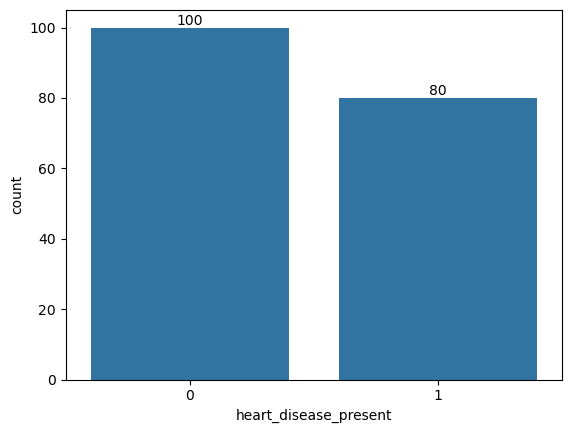

In [28]:
#1.target[heart_disease_present]
Targets=sns.countplot(x=data['heart_disease_present'])
for bars in Targets.containers:
    Targets.bar_label(bars)

* 0 represents no heart disease present   
* 1 represents heart disease present  

In [30]:
data.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [31]:
num_col = data[['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina']]
cat_col = data['thal']

* Univariate Analysis of Numerical feature

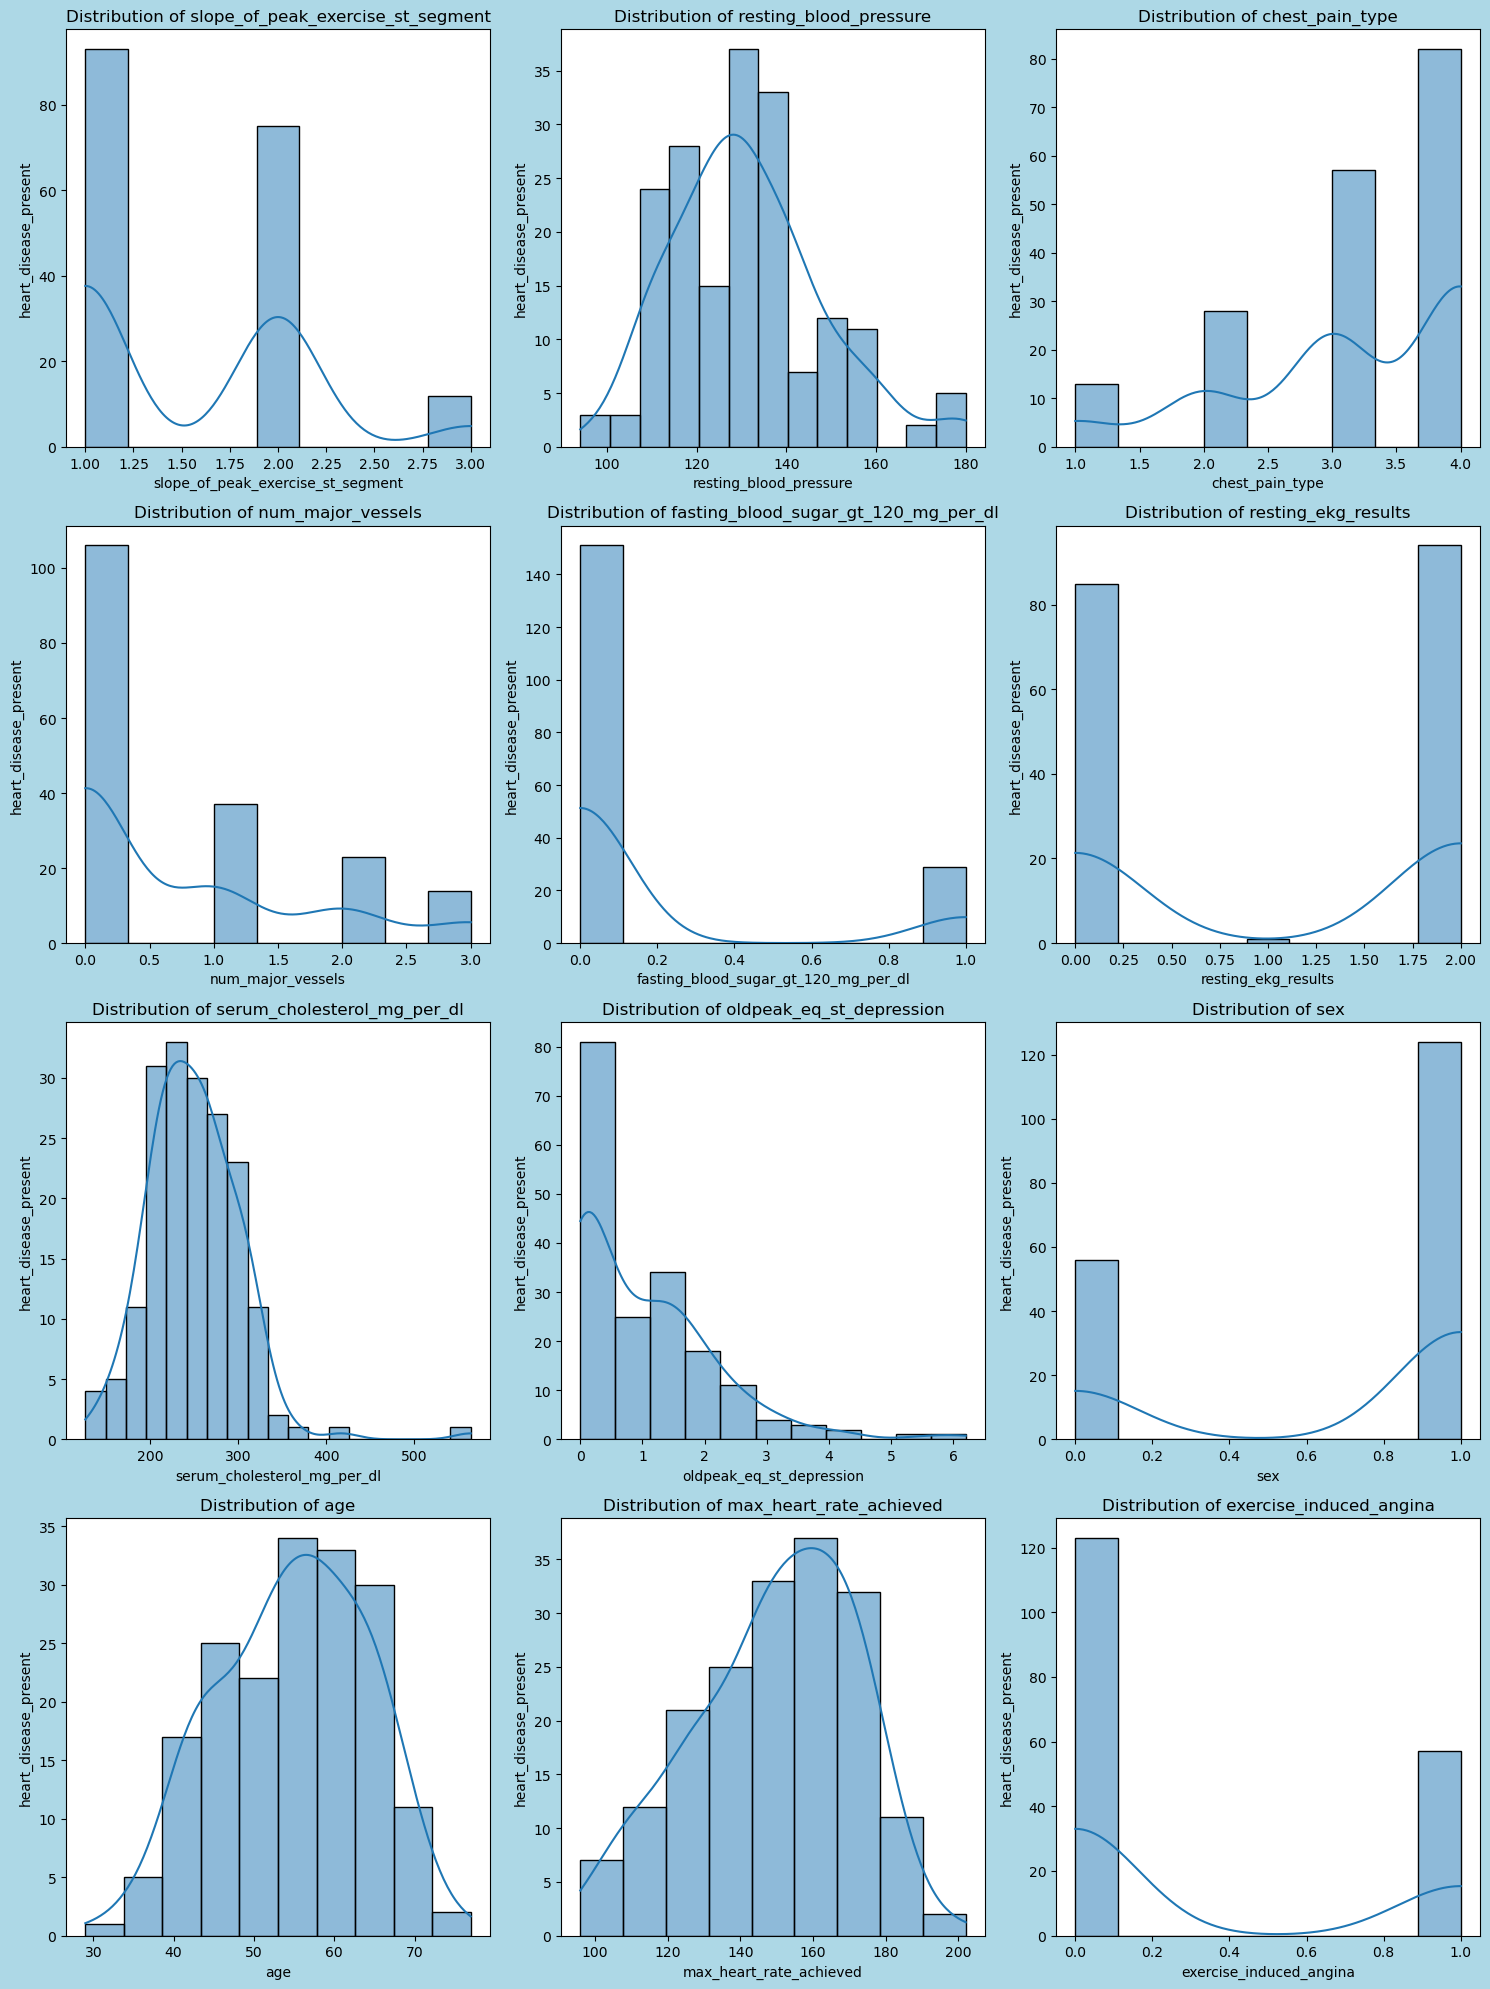

In [33]:
#Analys all independend feature
plt.figure(figsize=(15,20),facecolor='lightblue')
plotnumber=1
for column in num_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        columns= sns.histplot(num_col[column],kde = True)
        plt.xlabel(column,fontsize=10) # Set labels and title
        plt.ylabel('heart_disease_present',fontsize=10)
        plt.title(f'Distribution of {column}')
    plotnumber+=1
plt.tight_layout()

* Univariate Analysis of Catagorical Feature

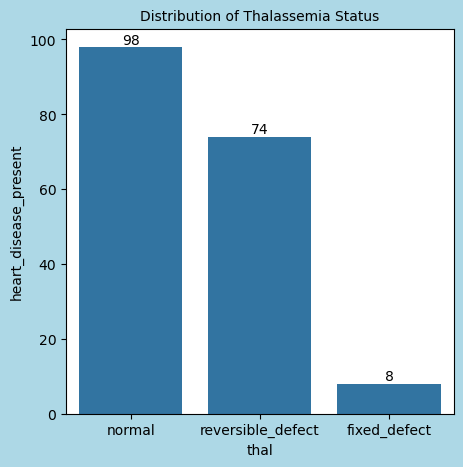

In [35]:
plt.figure(figsize=(5,5),facecolor='lightblue')
thal=sns.countplot(x=data['thal'])
for bars in thal.containers:
    thal.bar_label(bars)
# Set labels and title
plt.xlabel('thal', fontsize=10)
plt.ylabel('heart_disease_present', fontsize=10)
plt.title('Distribution of Thalassemia Status', fontsize=10)
plt.show()

**Bivariate Analysis**

* Bivariate Analysis of numerical feature

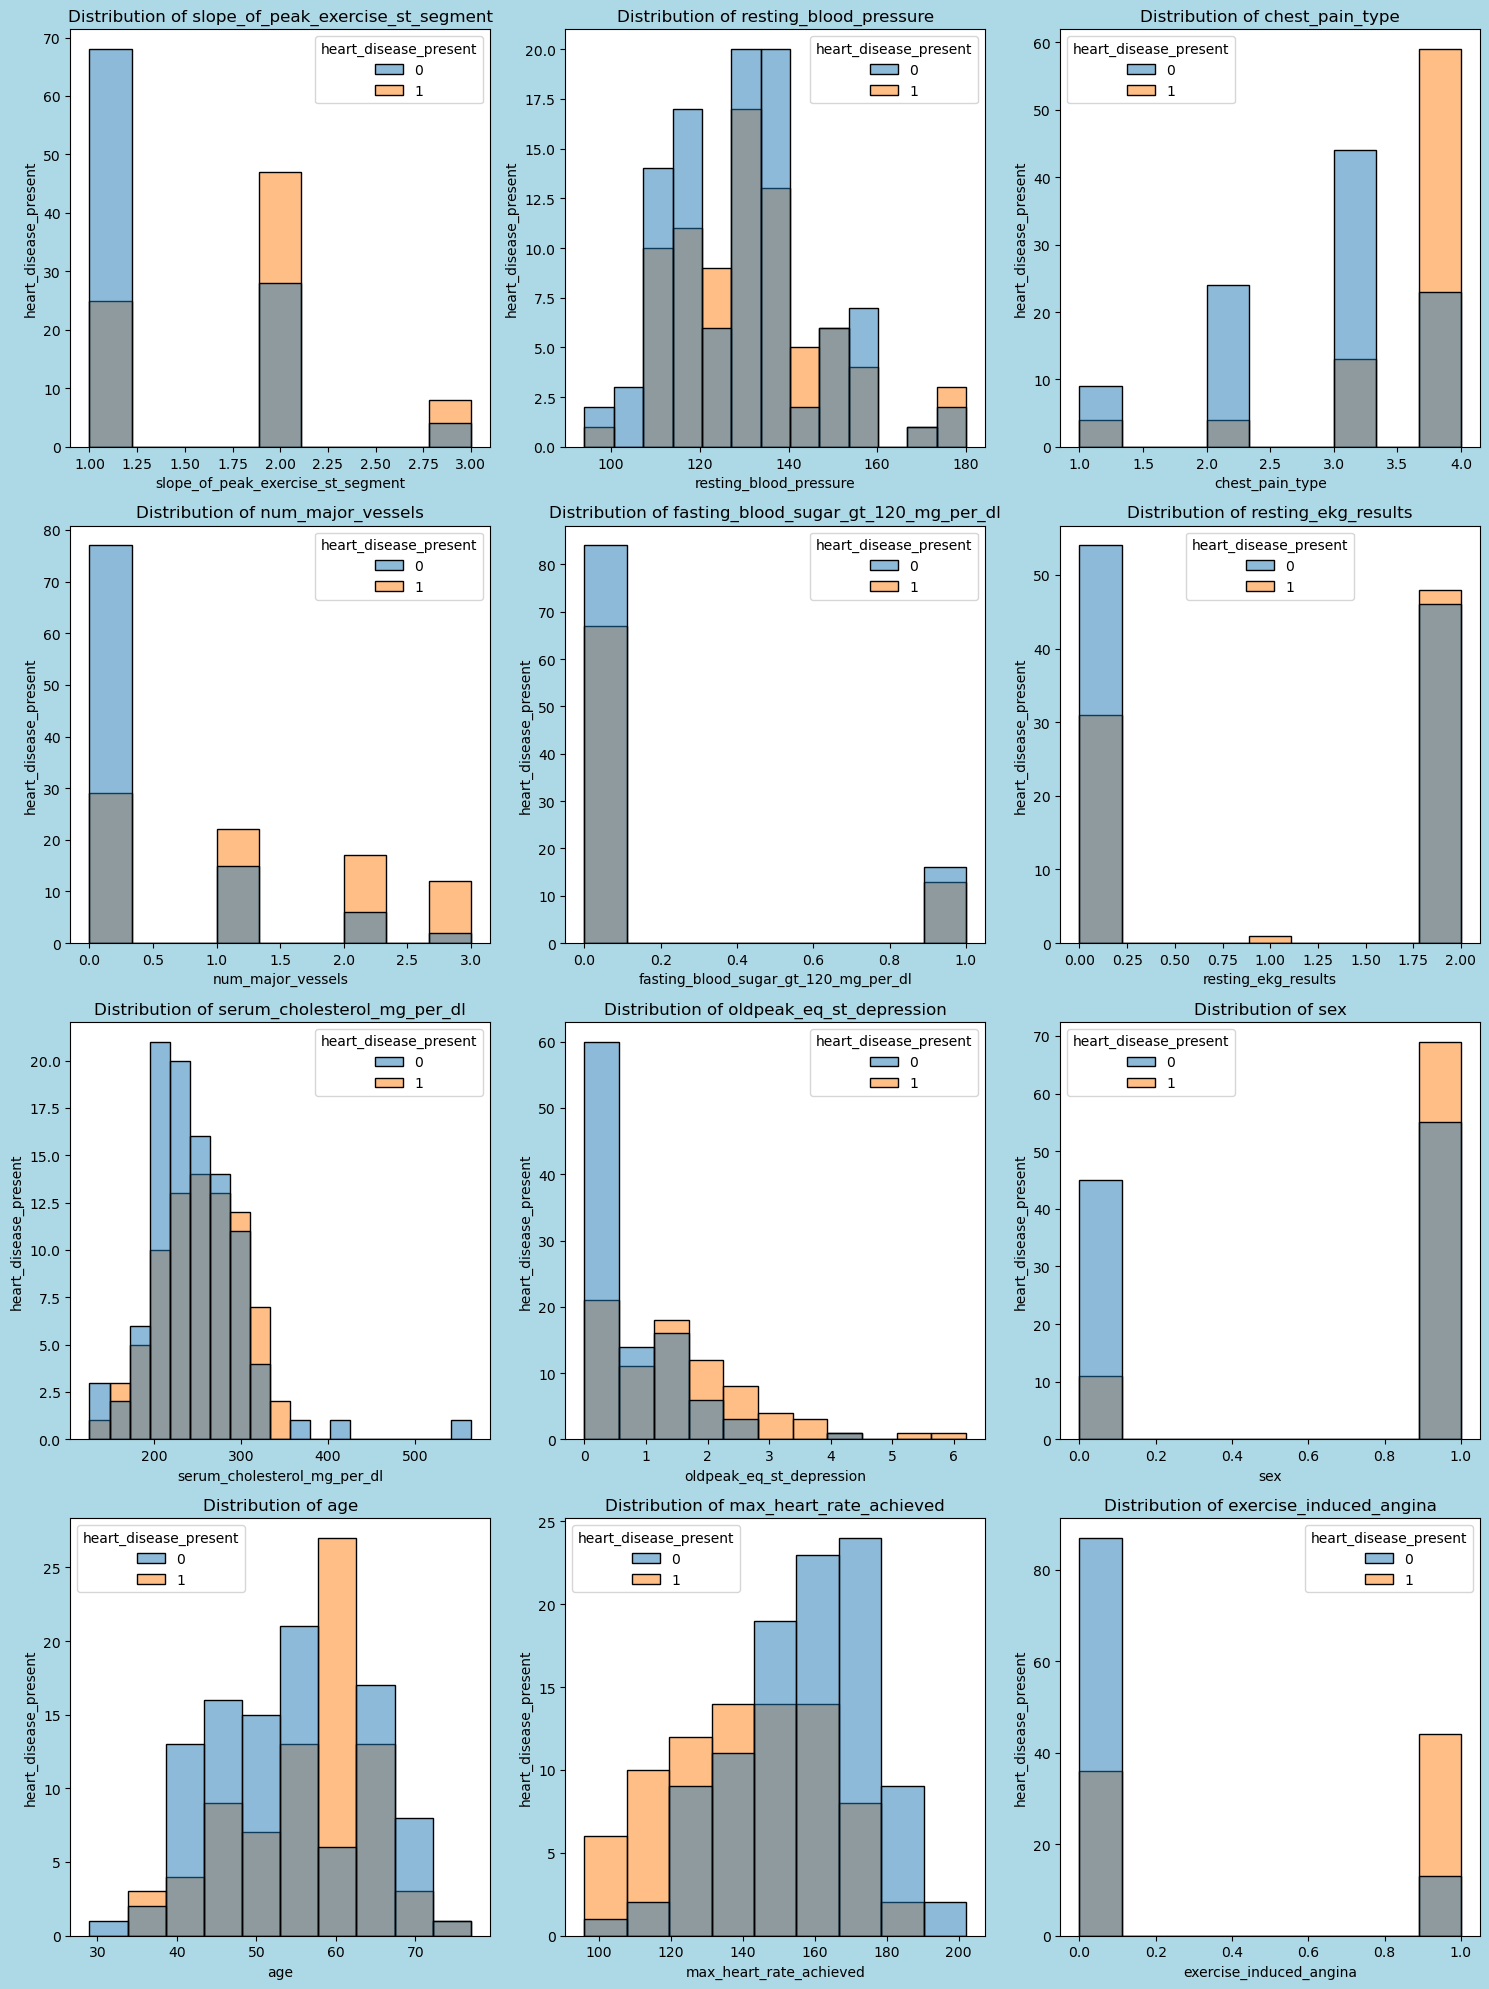

In [38]:
plt.figure(figsize=(15,20),facecolor='lightblue')
plotnumber=1
for column in num_col:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.histplot(x=num_col[column],hue=data['heart_disease_present'])
        plt.xlabel(column,fontsize=10) # Set labels and title
        plt.ylabel('heart_disease_present',fontsize=10)
        plt.title(f'Distribution of {column}')
    plotnumber+=1
plt.tight_layout()

* bivariate Analysis of Catagorical Feature

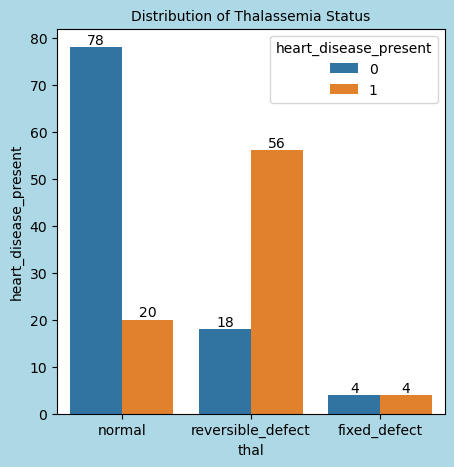

In [40]:
plt.figure(figsize=(5,5),facecolor='lightblue')
thal=sns.countplot(x=data['thal'],hue = data['heart_disease_present'])
for bars in thal.containers:
    thal.bar_label(bars)
# Set labels and title
plt.xlabel('thal', fontsize=10)
plt.ylabel('heart_disease_present', fontsize=10)
plt.title('Distribution of Thalassemia Status', fontsize=10)
plt.show()

**heart_disease_present**

* Oldpeak, Chest Pain Type, Max Heart Rate, and Thalassemia are strong predictors of heart disease.
* Certain features like Sex and Resting Blood Pressure have weaker relationships with heart disease.
* More detailed multivariate analysis can help confirm which features are most important for prediction.

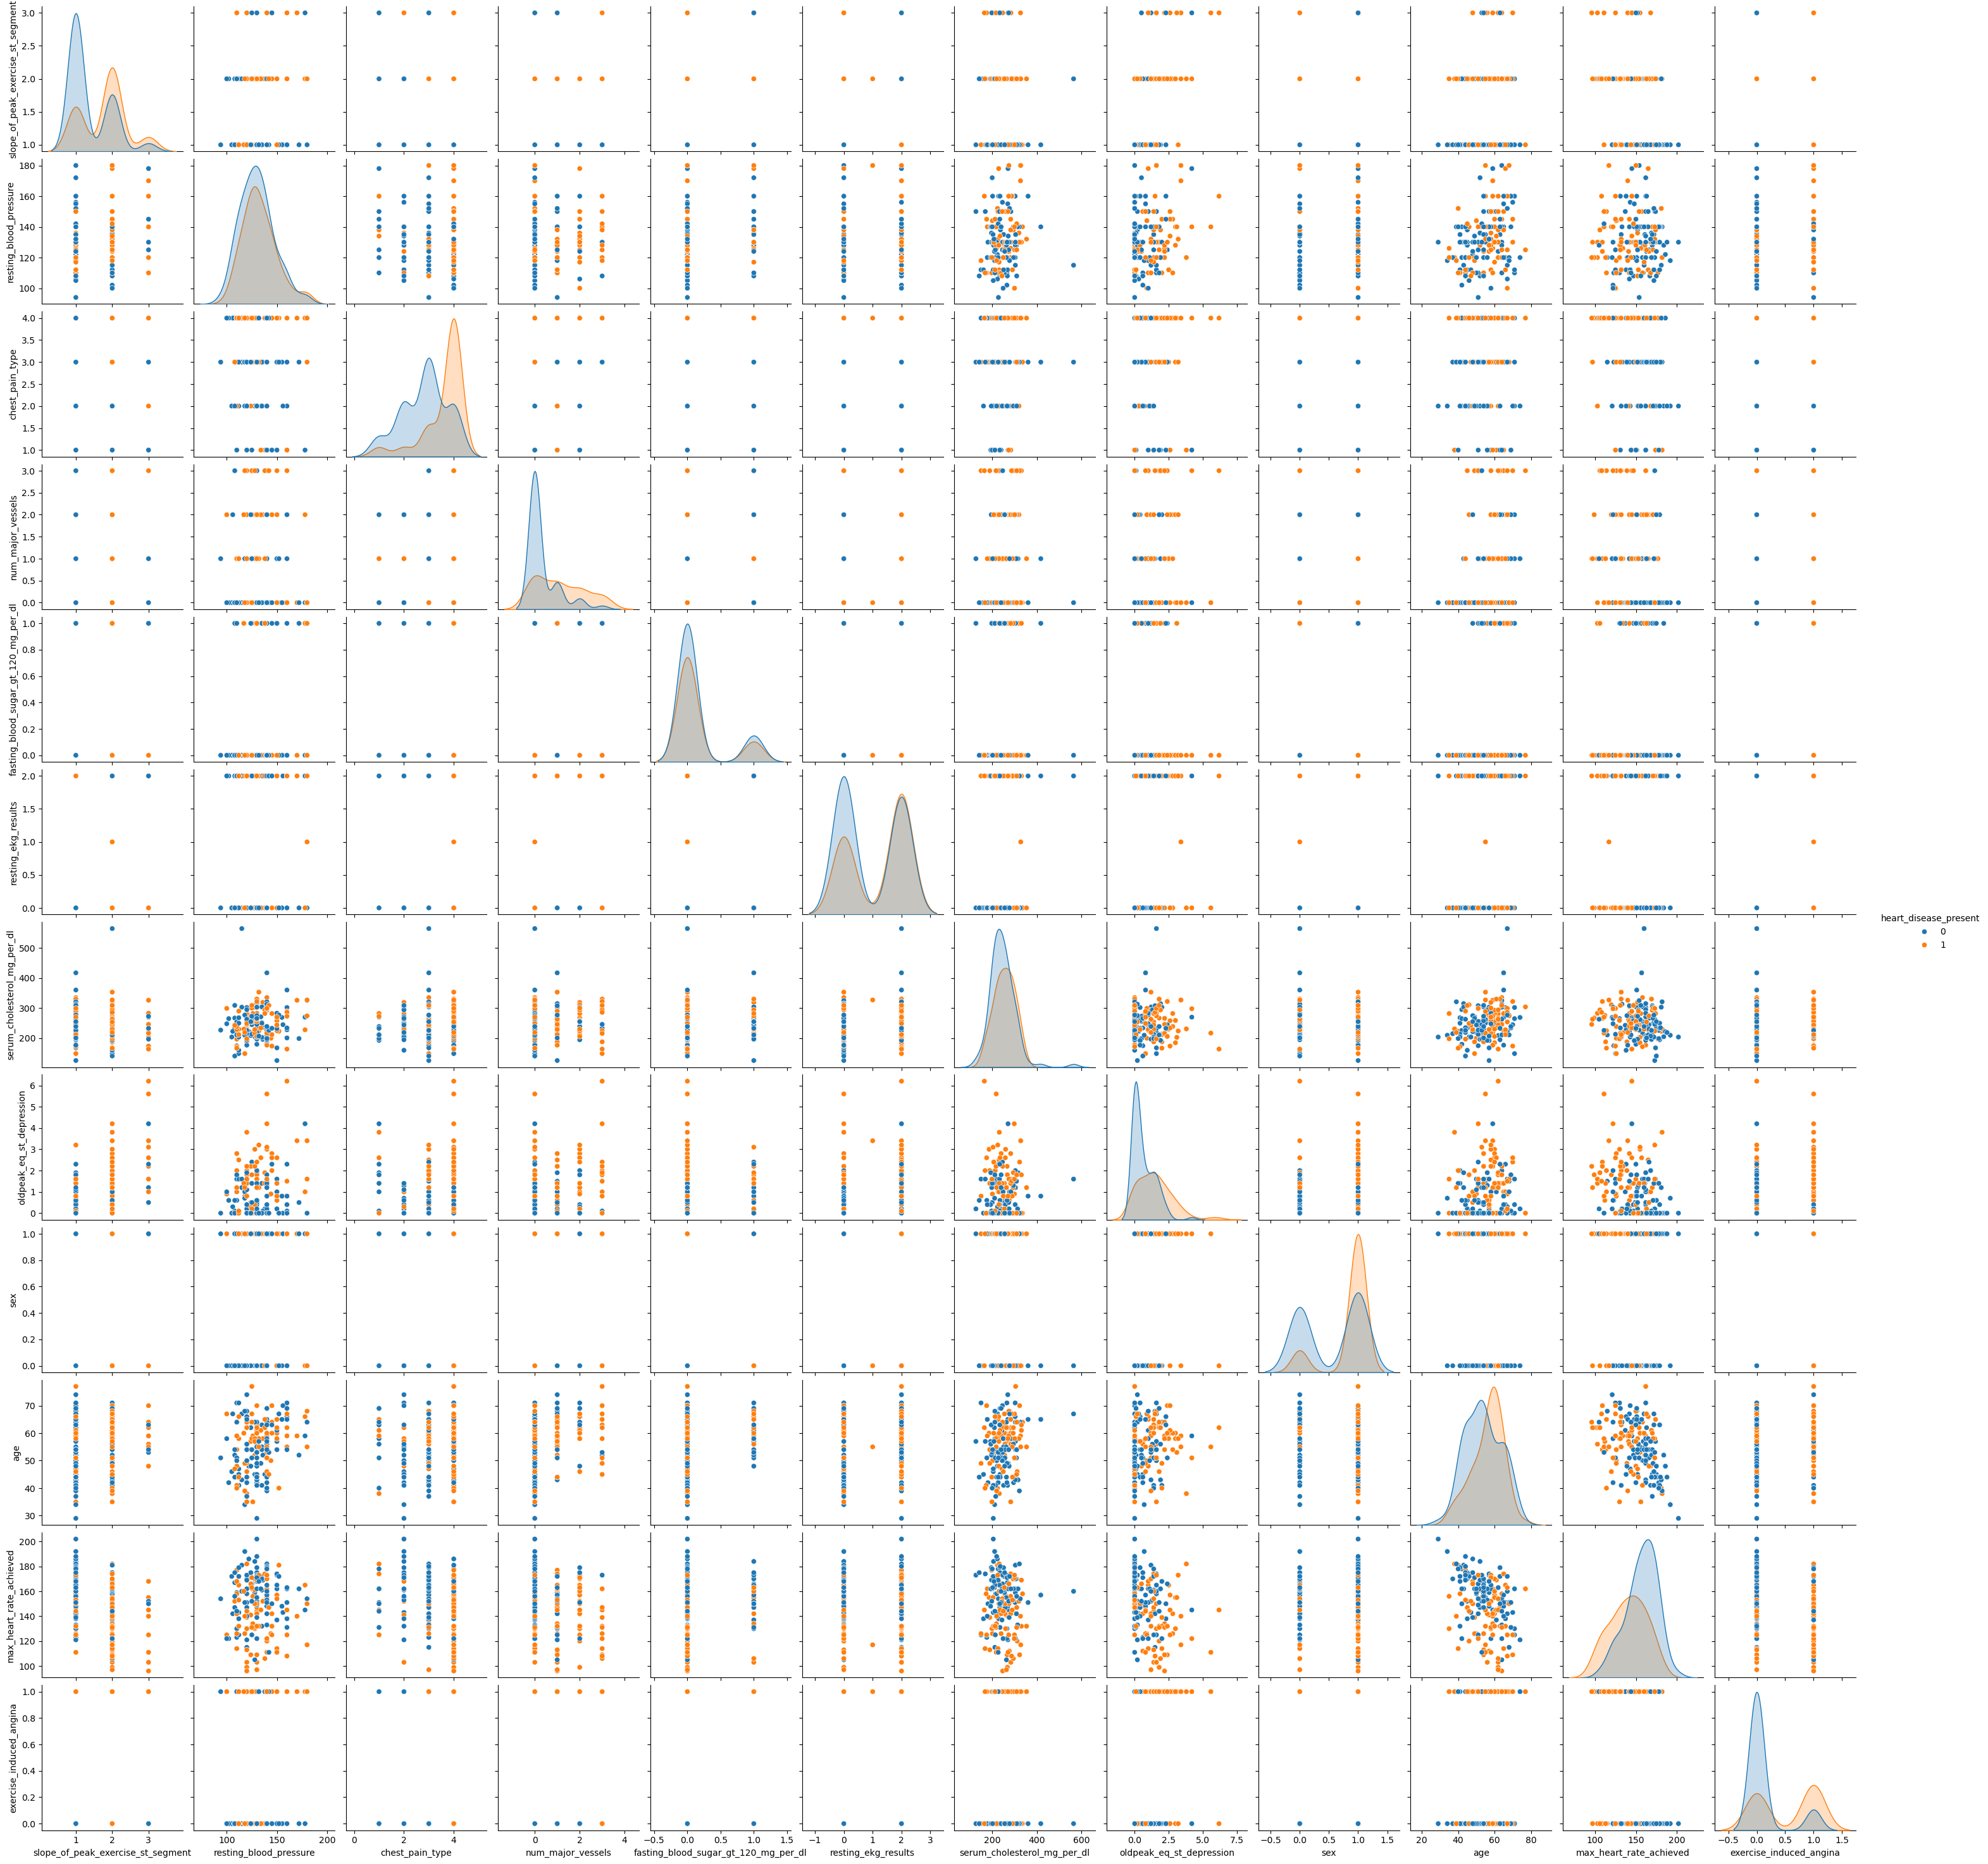

In [43]:
sns.pairplot(data, hue='heart_disease_present')
plt.show()

* A combination of features provides a better prediction than individual features alone.
* Chest Pain Type, ST Depression (Oldpeak), Number of Major Vessels, and Thalassemia are the most significant predictors.
* Max Heart Rate Achieved is a strong protective factor—higher values suggest lower risk.

# Data Preprocessing and Feature Engineering.

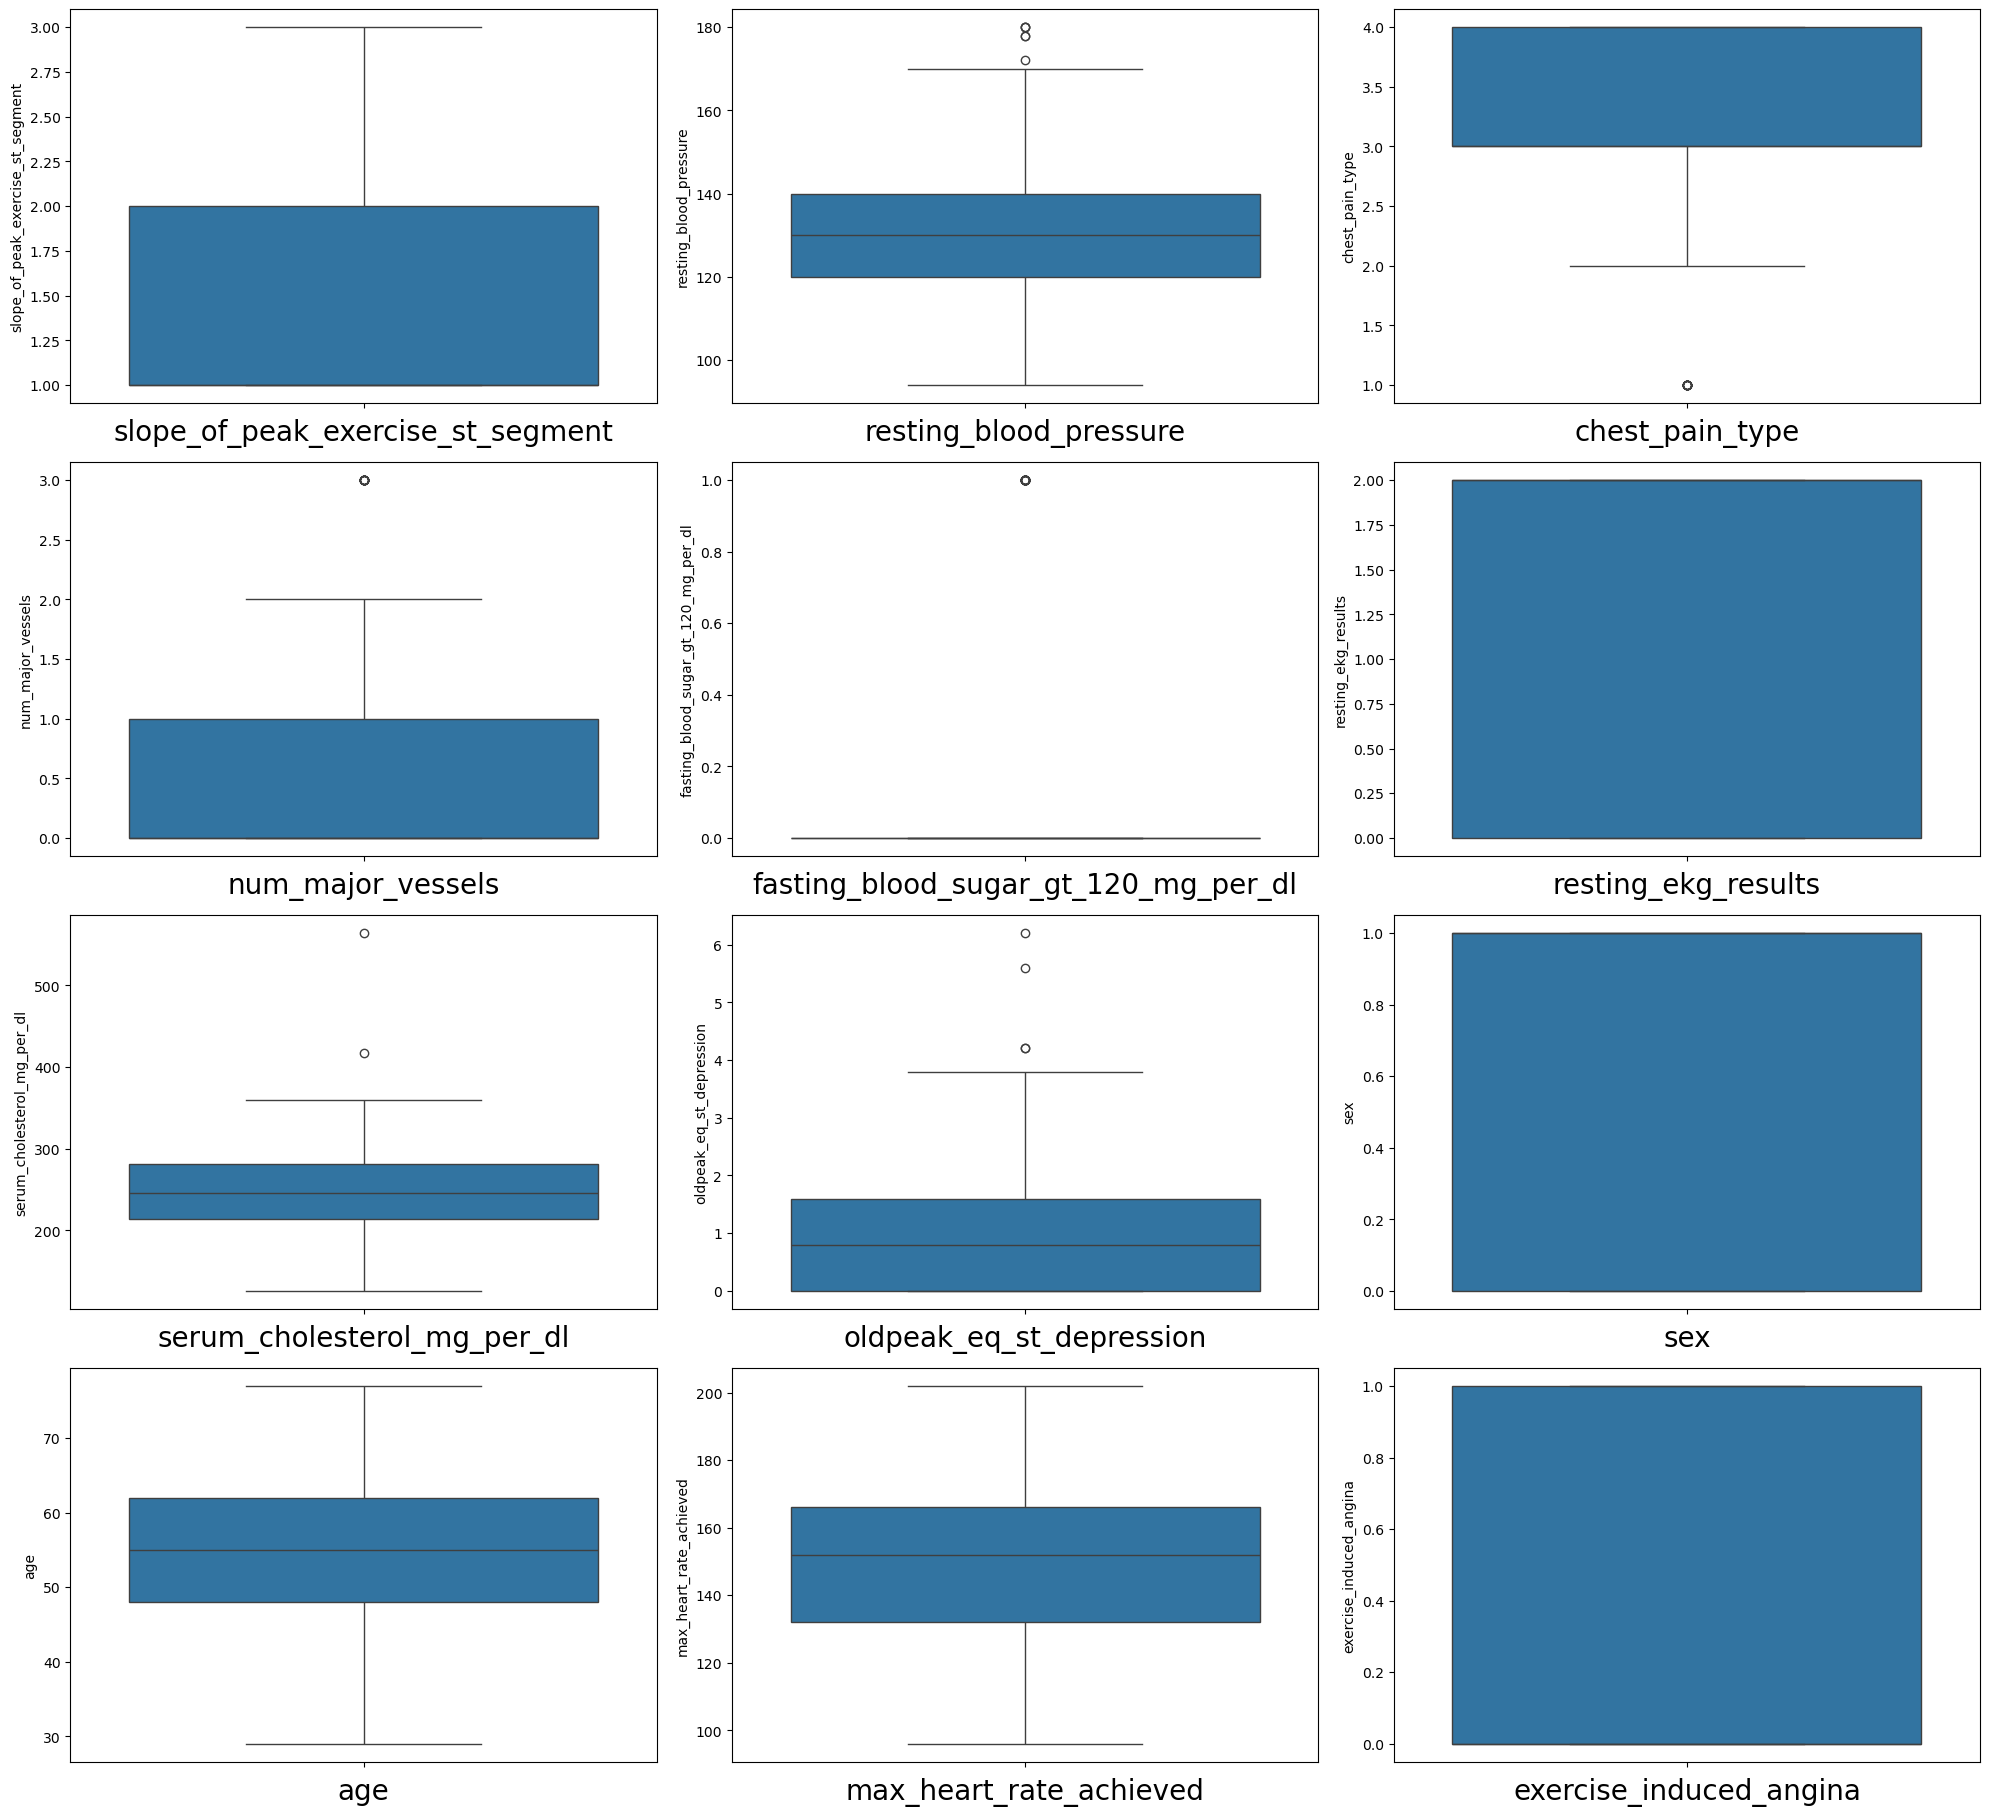

In [46]:
# To display the outliers in all features in one code using for loop.
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(num_col[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [47]:
# Handle outliers by replacing extreme values with median (from non-outliers)
data.loc[data.resting_blood_pressure > 170, 'resting_blood_pressure'] = data[data.resting_blood_pressure <= 170]['resting_blood_pressure'].median()
data.loc[data.serum_cholesterol_mg_per_dl > 400, 'serum_cholesterol_mg_per_dl'] = data[data.serum_cholesterol_mg_per_dl <= 400]['serum_cholesterol_mg_per_dl'].median()
data.loc[data.oldpeak_eq_st_depression > 4, 'oldpeak_eq_st_depression'] = data[data.oldpeak_eq_st_depression <= 4]['oldpeak_eq_st_depression'].median()


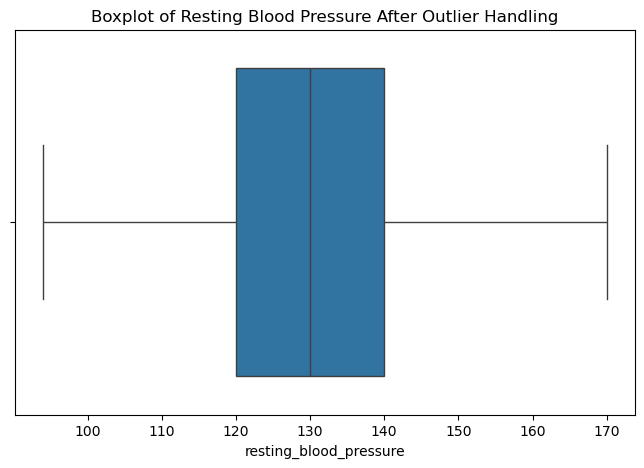

In [48]:
# Boxplot to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['resting_blood_pressure'])
plt.title("Boxplot of Resting Blood Pressure After Outlier Handling")
plt.show()

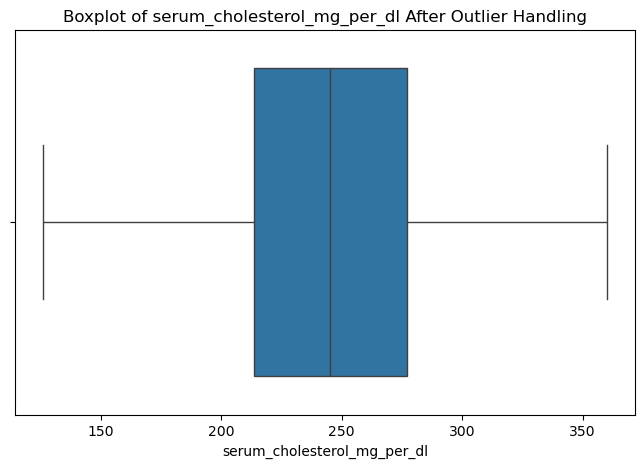

In [49]:
# Boxplot to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['serum_cholesterol_mg_per_dl'])
plt.title("Boxplot of serum_cholesterol_mg_per_dl After Outlier Handling")
plt.show()


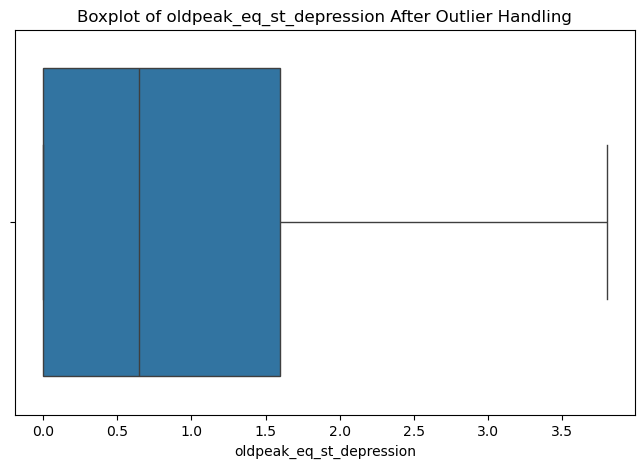

In [50]:
# Boxplot to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['oldpeak_eq_st_depression'])
plt.title("Boxplot of oldpeak_eq_st_depression After Outlier Handling")
plt.show()

In [51]:
#convert catagorical feature into numerical
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [52]:
data['thal']=LE.fit_transform(data['thal'])
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.00,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.60,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.00,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.00,1,40,181,0,1
4,3,2,130,1,0,0,2,270,0.65,1,59,145,0,0


# Feature Selection

In [54]:
#scaleing the data 
from sklearn.preprocessing import MinMaxScaler
MMS= MinMaxScaler()

In [55]:
data[['resting_blood_pressure','serum_cholesterol_mg_per_dl','max_heart_rate_achieved','age']]=MMS.fit_transform(data[['resting_blood_pressure','serum_cholesterol_mg_per_dl','max_heart_rate_achieved','age']])

In [56]:
data.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.366667,0.469883,3.155556,0.694444,0.161111,1.050000,0.514886,0.912222,0.688889,0.537731,0.504560,0.316667,0.444444
std,0.618838,0.568247,0.192260,0.938454,0.969347,0.368659,0.998742,0.194011,0.932118,0.464239,0.194474,0.208146,0.466474,0.498290
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.342105,3.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.000000,0.395833,0.339623,0.000000,0.000000
50%,1.000000,1.000000,0.473684,3.000000,0.000000,0.000000,2.000000,0.508547,0.650000,1.000000,0.541667,0.528302,0.000000,0.000000
75%,2.000000,2.000000,0.605263,4.000000,1.000000,0.000000,2.000000,0.645299,1.600000,1.000000,0.687500,0.662736,1.000000,1.000000
max,3.000000,2.000000,1.000000,4.000000,3.000000,1.000000,2.000000,1.000000,3.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Checking correlation 
data.corr()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.154101,0.061536,0.121207,0.076832,0.050199,0.172191,-0.047297,0.528219,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1.000000,-0.062529,0.269583,0.174107,-0.070225,-0.052171,0.023843,0.185561,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_blood_pressure,0.061536,-0.062529,1.000000,-0.037038,0.090367,0.096842,0.113544,0.163299,0.107277,-0.016618,0.259479,-0.014901,0.056117,0.076048
chest_pain_type,0.121207,0.269583,-0.037038,1.000000,0.249061,-0.088992,0.033379,0.081098,0.070301,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.174107,0.090367,0.249061,1.000000,0.169792,0.096656,0.135654,0.164295,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,-0.070225,0.096842,-0.088992,0.169792,1.000000,0.053864,0.000996,-0.000885,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,-0.052171,0.113544,0.033379,0.096656,0.053864,1.000000,0.140911,0.118760,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.047297,0.023843,0.163299,0.081098,0.135654,0.000996,0.140911,1.000000,-0.006180,-0.087191,0.199934,-0.108413,0.137559,0.146528
oldpeak_eq_st_depression,0.528219,0.185561,0.107277,0.070301,0.164295,-0.000885,0.118760,-0.006180,1.000000,0.120510,0.201135,-0.320952,0.262150,0.385765
sex,0.093340,0.265420,-0.016618,0.086057,0.073107,0.066010,0.045786,-0.087191,0.120510,1.000000,-0.148997,-0.053960,0.251096,0.335421


<Axes: >

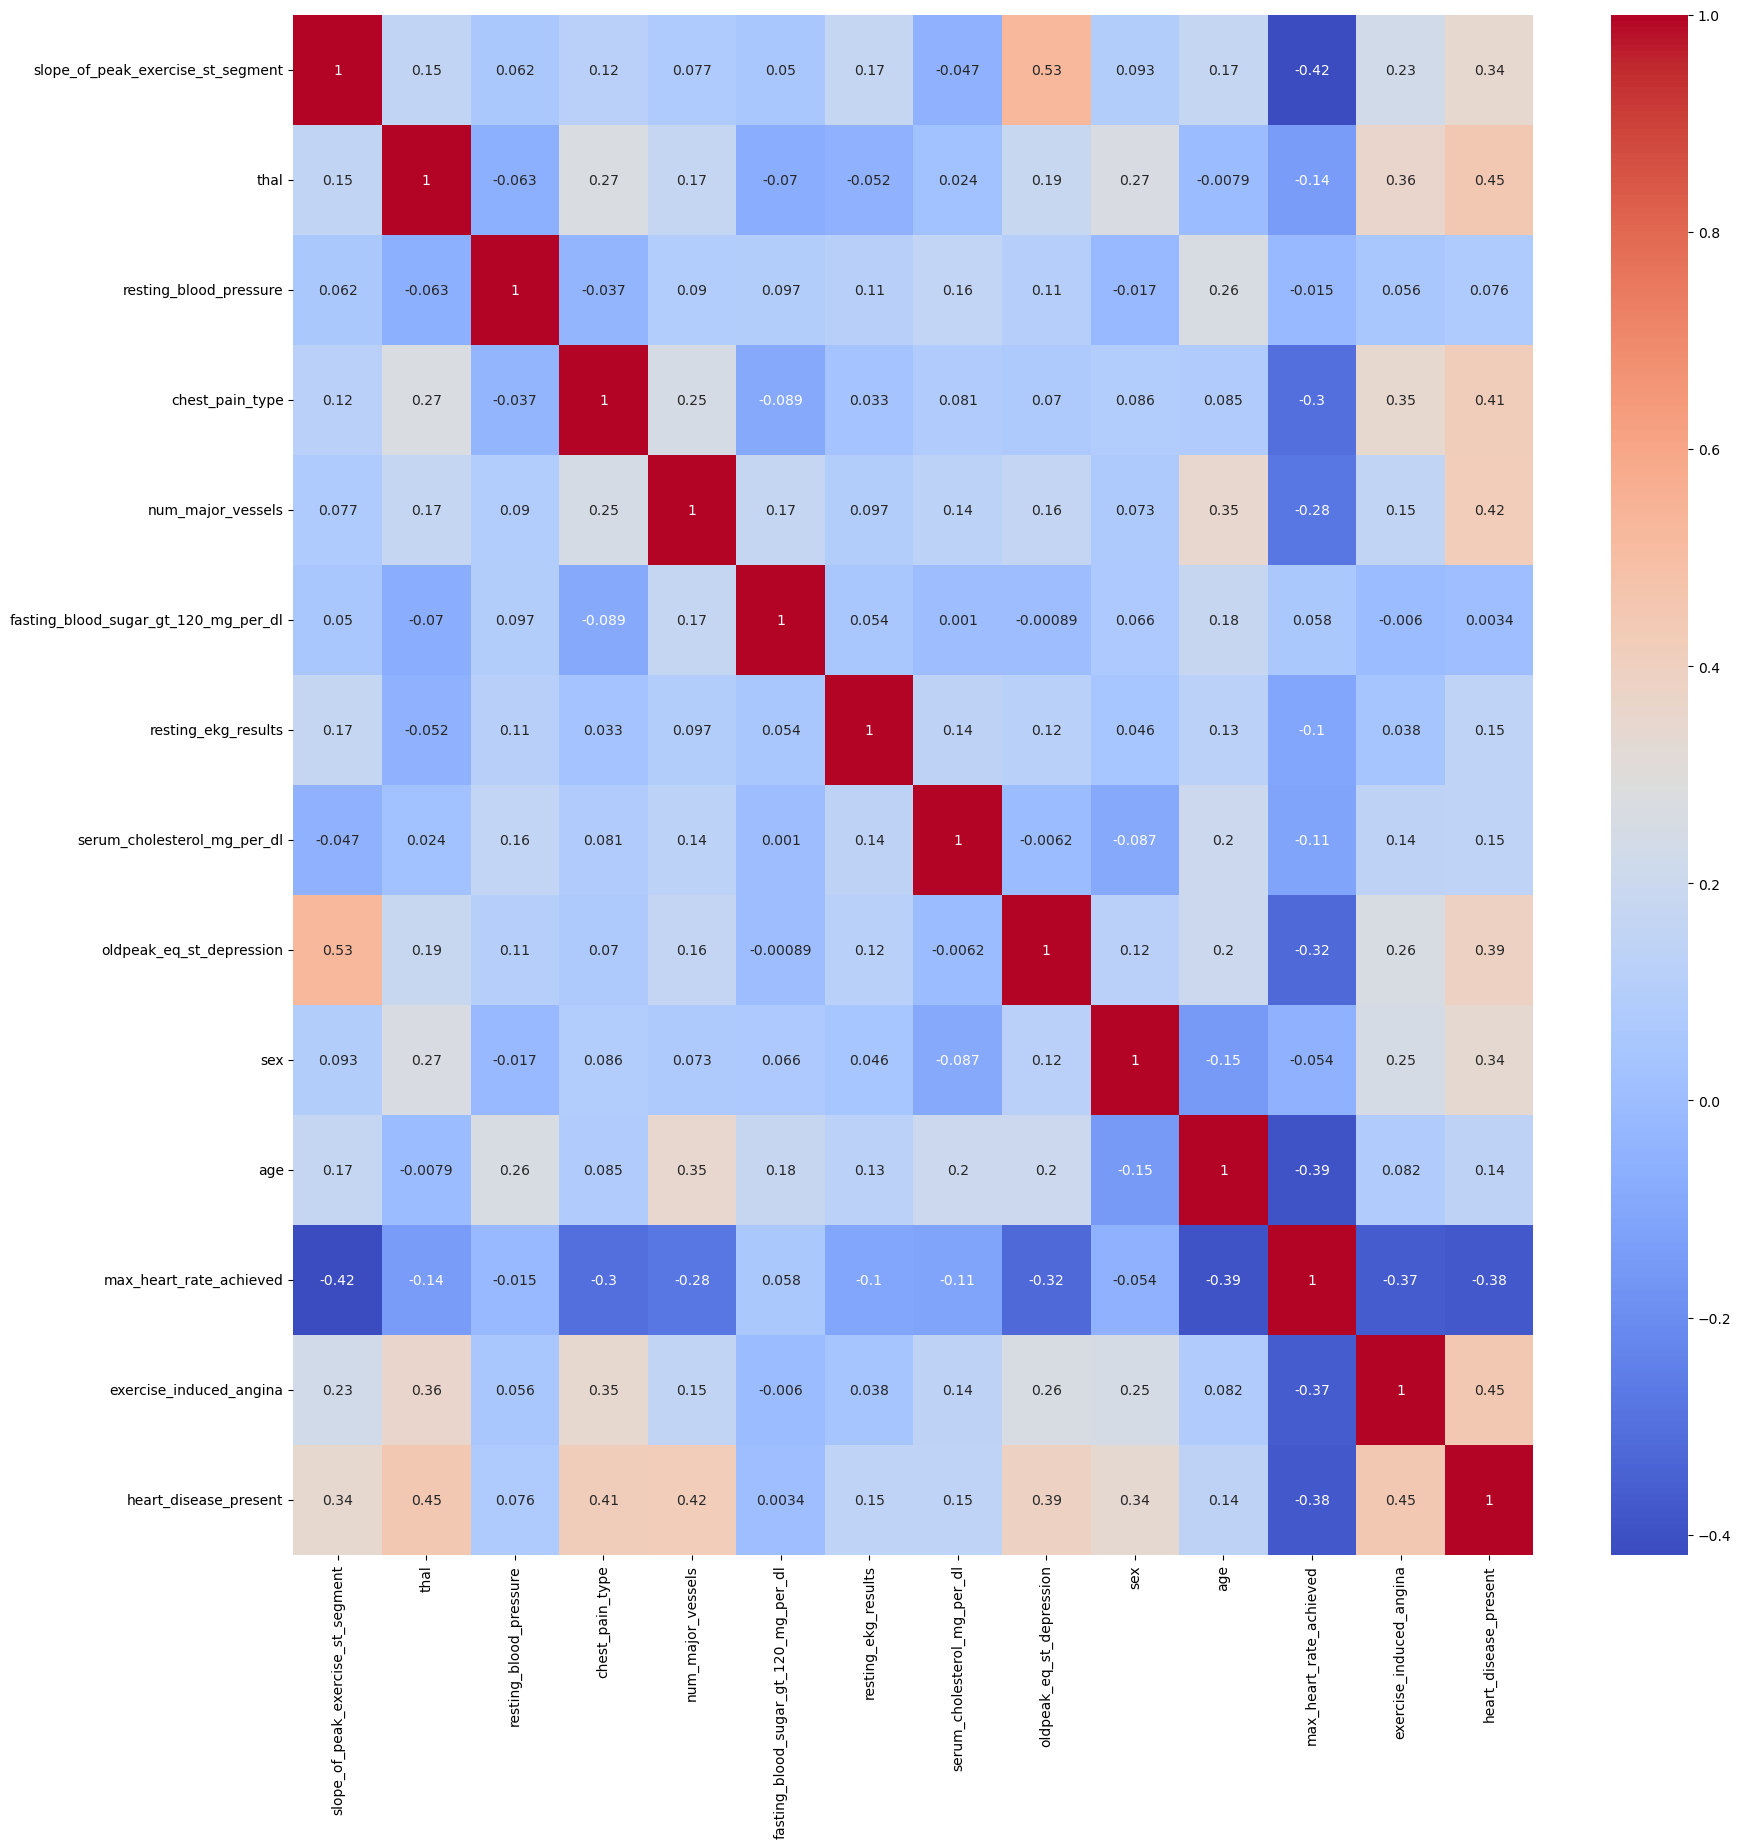

In [58]:
plt.figure(figsize=(20,20),facecolor='white')
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

* The dataset shows that exercise-induced angina, number of major vessels affected, thalassemia type, chest pain type, and oldpeak are strong predictors of heart disease. On the other hand, features like fasting blood sugar and cholesterol levels seem to have little impact on predicting heart disease.

# Data Splitting And Model Creation

In [61]:
X = data.iloc[:,:-1] # Independent Variables
X = X.iloc[:,1:]
X

,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,0.447368,2,0,0,2,0.777778,0.00,1,0.333333,0.698113,0
1,1,0.210526,3,0,0,0,0.376068,1.60,0,0.520833,0.584906,0
2,1,0.407895,4,3,0,2,0.760684,0.00,1,1.000000,0.622642,1
3,2,0.763158,4,0,0,0,0.414530,0.00,1,0.229167,0.801887,0
4,2,0.473684,1,0,0,2,0.615385,0.65,1,0.625000,0.462264,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,0.407895,4,2,1,0,0.547009,0.20,1,0.791667,0.632075,0
176,1,0.473684,4,0,0,1,0.858974,3.40,0,0.541667,0.198113,1
177,2,0.407895,3,0,0,0,0.782051,1.80,1,0.729167,0.330189,1
178,1,0.394737,3,2,1,0,0.551282,0.00,1,0.395833,0.745283,0


In [62]:
y = data.iloc[:,-1]
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [64]:
X_train

,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
117,2,0.210526,4,0,0,2,0.196581,0.0,1,0.250000,0.584906,0
65,2,0.421053,4,0,0,2,0.666667,0.0,1,0.125000,0.566038,1
67,1,0.276316,4,0,0,0,0.756410,1.2,1,0.291667,0.801887,0
31,2,0.736842,4,3,0,2,0.423077,1.0,0,0.750000,0.169811,0
12,1,0.605263,3,0,0,0,0.893162,0.0,1,0.729167,0.584906,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0.236842,4,0,0,0,0.333333,0.1,1,0.375000,0.443396,0
106,2,0.736842,3,0,0,2,0.452991,1.6,1,0.520833,0.650943,0
14,2,0.342105,1,0,0,0,0.448718,3.8,1,0.187500,0.811321,1
92,1,0.539474,3,0,1,0,0.760684,0.0,0,0.520833,0.698113,0


In [65]:
X_test

,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
19,1,0.552632,2,2,1,2,0.824786,0.00,0,0.604167,0.528302,0
42,1,0.210526,3,1,1,2,0.594017,0.00,0,0.875000,0.320755,0
153,1,0.236842,4,1,0,2,0.700855,0.00,1,0.312500,0.537736,0
78,2,0.671053,4,2,0,2,0.666667,2.80,1,0.645833,0.433962,1
145,1,0.605263,2,2,0,0,0.294872,0.00,0,0.708333,0.783019,0
15,2,0.657895,4,0,0,2,0.316239,0.90,1,0.437500,0.283019,1
24,1,0.815789,2,0,0,2,0.508547,0.00,1,0.854167,0.443396,0
68,1,0.539474,2,0,0,2,0.529915,1.40,0,0.541667,0.613208,0
113,2,0.473684,3,0,1,2,0.632479,1.60,1,0.812500,0.509434,1
118,2,0.500000,4,1,0,0,0.970085,1.20,1,0.541667,0.339623,1


In [66]:
y_train

117    1
65     1
67     0
31     1
12     1
      ..
71     0
106    0
14     1
92     0
102    1
Name: heart_disease_present, Length: 144, dtype: int64

In [67]:
y_train.value_counts()

heart_disease_present
0    84
1    60
Name: count, dtype: int64

In [68]:
from sklearn.linear_model import LogisticRegression 
model_log= LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred_log= model_log.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score

In [71]:
accuracy_logistic = accuracy_score(y_test,y_pred_log)
accuracy_logistic

0.8333333333333334

In [72]:
cm_log = confusion_matrix(y_test,y_pred_log)
cm_log

array([[15,  1],
       [ 5, 15]], dtype=int64)

In [73]:
precision_log = precision_score(y_test,y_pred_log)
precision_log 

0.9375

In [74]:
recall_log = recall_score(y_test,y_pred_log)
recall_log

0.75

In [75]:
f1_score_log = f1_score(y_test,y_pred_log)
f1_score_log

0.8333333333333334

In [76]:
cr_log = classification_report(y_test,y_pred_log)
print(cr_log)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [78]:
from sklearn.svm import SVC
model_svm = SVC(C=5, kernel='linear')
model_svm.fit(X_train, y_train)

SVC(C=5, kernel='linear')

In [79]:
y_pred_svm = model_svm.predict(X_test)

In [80]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
cm_svm = confusion_matrix(y_test,y_pred_svm)
recall_svm = recall_score(y_test,y_pred_svm)
precision_svm = precision_score(y_test,y_pred_svm)
f1_score_svm  = f1_score(y_test,y_pred_svm)
cr_svm  = classification_report(y_test,y_pred_svm)
print('accuracy_svm:',accuracy_svm)
print('cm_svm:',cm_svm)
print('recall_svm:',recall_svm)
print('precision_svm:',precision_svm)
print('f1_score_svm:',f1_score_svm)
print('cr_svm:',cr_svm)


accuracy_svm: 0.8055555555555556
cm_svm: [[15  1]
 [ 6 14]]
recall_svm: 0.7
precision_svm: 0.9333333333333333
f1_score_svm: 0.8
cr_svm:               precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



In [81]:
from sklearn.neighbors import KNeighborsClassifier  
score = []
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [82]:
score

[0.7777777777777778,
 0.7222222222222222,
 0.8055555555555556,
 0.75,
 0.7777777777777778,
 0.75,
 0.8611111111111112,
 0.7777777777777778,
 0.8611111111111112,
 0.8333333333333334,
 0.8333333333333334,
 0.8055555555555556,
 0.8055555555555556,
 0.7777777777777778,
 0.8333333333333334,
 0.8055555555555556,
 0.8611111111111112,
 0.8055555555555556,
 0.8333333333333334]

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [84]:
y_pred_knn=model_knn.predict(X_test)

In [85]:
accuracy_knn = accuracy_score(y_test,y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)
recall_knn = recall_score(y_test,y_pred_knn)
precision_knn = precision_score(y_test,y_pred_knn)
f1_score_knn  = f1_score(y_test,y_pred_knn)
cr_knn  = classification_report(y_test,y_pred_knn)
print('accuracy_knn:',accuracy_knn)
print('cm_knn:',cm_knn)
print('recall_knn:',recall_knn)
print('precision_knn:',precision_knn)
print('f1_score_knn:',f1_score_knn)
print('cr_knn:',cr_knn)

accuracy_knn: 0.8611111111111112
cm_knn: [[16  0]
 [ 5 15]]
recall_knn: 0.75
precision_knn: 1.0
f1_score_knn: 0.8571428571428571
cr_knn:               precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [86]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [87]:
y_pred_gbc = model_gbc.predict(X_test)
y_pred_gbc

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [88]:
accuracy_gbc= accuracy_score(y_test,y_pred_gbc)
cm_gbc= confusion_matrix(y_test,y_pred_gbc)
recall_gbc= recall_score(y_test,y_pred_gbc)
precision_gbc= precision_score(y_test,y_pred_gbc)
f1_score_gbc= f1_score(y_test,y_pred_gbc)
cr_gbc= classification_report(y_test,y_pred_gbc)
print('accuracy_gbc:',accuracy_gbc)
print('cm_gbc:',cm_gbc)
print('recall_gbc:',recall_gbc)
print('precision_gbc:',precision_gbc)
print('f1_score_gbc:',f1_score_gbc)
print('cr_gbc:',cr_gbc)

accuracy_gbc: 0.7777777777777778
cm_gbc: [[14  2]
 [ 6 14]]
recall_gbc: 0.7
precision_gbc: 0.875
f1_score_gbc: 0.7777777777777778
cr_gbc:               precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.88      0.70      0.78        20

    accuracy                           0.78        36
   macro avg       0.79      0.79      0.78        36
weighted avg       0.80      0.78      0.78        36



In [89]:
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier(max_depth=10,min_samples_split=5)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [90]:
y_pred_dt = model_dt.predict(X_test)
y_pred_dt

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [91]:
accuracy_dt= accuracy_score(y_test,y_pred_dt)
print('accuracy_dt:',accuracy_dt)
cm_dt= confusion_matrix(y_test,y_pred_dt)
print('cm_dt:',cm_dt)
recall_dt= recall_score(y_test,y_pred_dt)
print('recall_dt:',recall_dt)
precision_dt= precision_score(y_test,y_pred_dt)
print('precision_dt:',precision_dt)
f1_score_dt= f1_score(y_test,y_pred_dt)
print('f1_score_dt:',f1_score_dt)
cr_dt= classification_report(y_test,y_pred_dt)
print('cr_dt:',cr_dt)

accuracy_dt: 0.7777777777777778
cm_dt: [[15  1]
 [ 7 13]]
recall_dt: 0.65
precision_dt: 0.9285714285714286
f1_score_dt: 0.7647058823529411
cr_dt:               precision    recall  f1-score   support

           0       0.68      0.94      0.79        16
           1       0.93      0.65      0.76        20

    accuracy                           0.78        36
   macro avg       0.81      0.79      0.78        36
weighted avg       0.82      0.78      0.78        36



In [92]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=20,min_samples_leaf=10)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=10)

In [93]:
y_pred_rt = model_rf.predict(X_test)
y_pred_rt

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [94]:
accuracy_rt= accuracy_score(y_test,y_pred_rt)
print('accuracy_rt:',accuracy_rt)
cm_rt= confusion_matrix(y_test,y_pred_rt)
print('cm_rt:',cm_rt)
recall_rt= recall_score(y_test,y_pred_rt)
print(recall_rt)
precision_rt= precision_score(y_test,y_pred_rt)
print(precision_rt)
f1_score_rt= f1_score(y_test,y_pred_rt)
print(f1_score_rt)
cr_rt= classification_report(y_test,y_pred_rt)
print(cr_rt)


accuracy_rt: 0.8333333333333334
cm_rt: [[16  0]
 [ 6 14]]
0.7
1.0
0.8235294117647058
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



In [95]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier( hidden_layer_sizes=(75,55),
                       learning_rate_init=0.001,
                       max_iter=100,
                       random_state=42) ## model object creation max_iter=Stopping parameter
model_mlp.fit(X_train,y_train) ## training the data

MLPClassifier(hidden_layer_sizes=(75, 55), max_iter=100, random_state=42)

In [96]:
y_predict_mlp = model_mlp.predict(X_test)

In [97]:
accuracy_mlp = accuracy_score(y_test,y_predict_mlp)
recall_mlp = recall_score(y_test,y_predict_mlp)
precision_mlp = precision_score(y_test,y_predict_mlp)
f1_score_mlp = f1_score(y_test,y_predict_mlp)
cr_mlp = classification_report(y_test,y_predict_mlp)
print('accuracy_mlp:',accuracy_mlp)
print('recall_mlp:',recall_mlp)
print('precision_mlp:',precision_mlp)
print('f1_score_mlp:',f1_score_mlp)
print('cr_mlp:',cr_mlp)

accuracy_mlp: 0.8611111111111112
recall_mlp: 0.8
precision_mlp: 0.9411764705882353
f1_score_mlp: 0.8648648648648649
cr_mlp:               precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.94      0.80      0.86        20

    accuracy                           0.86        36
   macro avg       0.87      0.87      0.86        36
weighted avg       0.87      0.86      0.86        36



In [98]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_log,X,y,cv=5,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.8        0.8        0.90322581 0.70588235 0.83870968]
Cross validation Score: 0.8095635673624288
Std : 0.06411681312714637


In [99]:
from sklearn.model_selection import RandomizedSearchCV
# Define hyperparameter space
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1, 10]}  # Kernel coefficient
# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model_svm, param_distributions=param_dist,n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train) # Fit the model
print("Best Parameters:", random_search.best_params_) # Best parameters
# Evaluate model with best parameters
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Best Model Accuracy:", accuracy)

Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Best Model Accuracy: 0.8333333333333334


In [100]:
# Assuming you have defined y_test and y_pred_* for each model
final_data = pd.DataFrame({
    'models': ['model_log', 'model_svm', 'model_knn', 'model_gbc', 'model_dt', 'model_rf', 'model_mlp'],
    'Acc': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_gbc),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rt),
        accuracy_score(y_test, y_predict_mlp)
    ],
    'recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_knn),
        recall_score(y_test, y_pred_gbc),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rt),
        recall_score(y_test, y_predict_mlp)],
     'precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_knn),
        precision_score(y_test, y_pred_gbc),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rt),
        precision_score(y_test, y_predict_mlp)
    ],
    'f1_score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_knn),
        f1_score(y_test, y_pred_gbc),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rt),
        f1_score(y_test, y_predict_mlp)
    ]
})

In [101]:
print(final_data)

      models       Acc  recall  precision  f1_score
0  model_log  0.833333    0.75   0.937500  0.833333
1  model_svm  0.805556    0.70   0.933333  0.800000
2  model_knn  0.861111    0.75   1.000000  0.857143
3  model_gbc  0.777778    0.70   0.875000  0.777778
4   model_dt  0.777778    0.65   0.928571  0.764706
5   model_rf  0.833333    0.70   1.000000  0.823529
6  model_mlp  0.861111    0.80   0.941176  0.864865


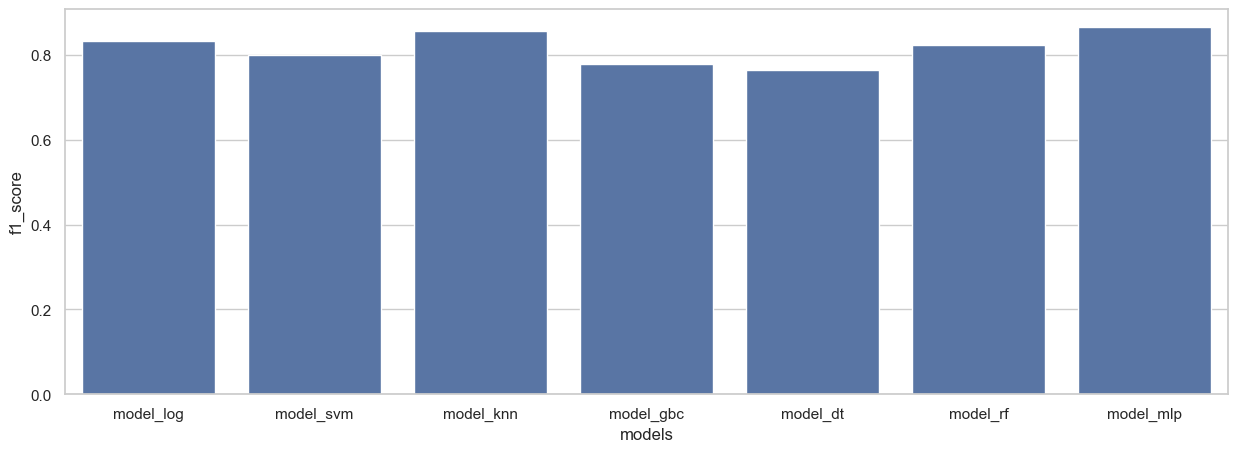

In [102]:
plt.figure(figsize=(15,5))
sns.set(style='whitegrid')
ax=sns.barplot(x='models',y='f1_score',data=final_data)

# Deployment

In [104]:
# saving the knn model
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)  # Ensure X_train and y_train are defined

# Save the trained model
filename = 'Heart_disease_prediction_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(knn, file)
print("KNN model saved successfully.")


KNN model saved successfully.


In [105]:
# Load the saved KNN model
with open(filename, 'rb') as file:
    loaded_knn = pickle.load(file)

# Make predictions
y_pred = loaded_knn.predict(X_test)  
# Evaluate the model
accuracy = loaded_knn.score(X_test, y_test) 
print(f"KNN Model Accuracy: {accuracy:.4f}")


KNN Model Accuracy: 0.8611


### Model Performance Summary

* We tested different machine learning models to predict heart disease. Here’s how they performed based on accuracy, recall, precision, and F1-score:
* 1. MLP (Neural Network) & KNN (K-Nearest Neighbors) → Best Performance
    * Accuracy: 86.1%, F1-score: 86.5%
    * MLP had the highest recall (80%), meaning it correctly identified most heart disease cases.
    * KNN had perfect precision (100%), meaning when it predicted heart disease, it was always correct.
* 2. Logistic Regression & Random Forest → Very Strong Performance
    * Accuracy: 83.3%, F1-score: ~83%
    * Logistic Regression had high precision (93.7%) and a balanced recall (75%).
    * Random Forest had perfect precision (100%) but slightly lower recall (70%).
* 3. SVM (Support Vector Machine) → Good Performance
    * Accuracy: 80.6%, F1-score: 80%
    * Strong precision (93.3%) but lower recall (70%).
* 4. Gradient Boosting (GBC) & Decision Tree (DT) → Lower Performance
    * GBC Accuracy: 77.8%, F1-score: 77.7%
    * DT Accuracy: 75%, F1-score: 74.2%
    * Decision Tree had the lowest accuracy and recall, meaning it missed more heart disease cases.
**Final conclusions:**
* MLP and KNN performed the best, making them the top choices.
* Logistic Regression and Random Forest are also strong options.
* SVM is decent, but GBC and DT are weaker in comparison.

### Challenges Faced in Heart Disease Prediction Project


* 1. Feature Selection & Engineering
    * Multicollinearity: Some features are highly correlated (e.g., ST Depression & Max Heart Rate), making it hard to determine their individual impact.
    * Categorical Data Handling: Variables like chest pain type and thalassemia need proper encoding for ML models to understand them.
* 2. Model Performance Challenges
    * Trade-offs Between Accuracy and Recall:
        * A highly accurate model may still miss predicting heart disease cases (low recall).
        * A high-recall model may over-predict cases, leading to unnecessary medical tests.
        * Hyperparameter Tuning: Finding the best settings for algorithms like MLP, Random Forest, and Logistic Regression requires multiple iterations.
* 3. Cross-Validation & Generalization
    * Variability in Results: Different train-test splits may yield varying performance scores.
    * Overfitting: Some models, like Random Forest, might perform well on training data but struggle with new data
* 4. Interpretability of Complex Models
   * Black-box Models: Advanced models like MLP (Neural Networks) and Gradient Boosting offer high accuracy but are harder to interpret for medical professionals.
   *  Model Trust: Clinicians need explainable AI to trust and act on the model's predictions.